In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [56]:
df_day=pd.read_csv("day.csv")
df_day.head()
count=df_day.isnull().sum()
print(count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [57]:
# checking for columns datatypes
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [58]:
# instant is an index column it is better to drop this column as this will not add any value to the data
df_day.drop(['instant'],axis=1,inplace=True)


In [59]:
# cnt is our target variable and sum of casual+registered is cnt so it is better to drop these
df_day.drop(['casual','registered'],axis=1,inplace=True)
df_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [60]:
# dteday is further divided into multiple columns like yr and month which we will use so we can drop dteday
df_day.drop(['dteday'],axis=1,inplace=True)
df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [61]:
#check for datatypes
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [62]:
# we have few categorical variables in the data like season,weekday,weathersit, lets replace season, weekday and weathersit with some numeric values

df_day['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df_day.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [63]:
df_day['weathersit'].replace({1:"Few Clouds",2:"Mist cloudy",3:"Light_rain_Light_snow",4:'Heavy_Rain_Thunderstorm'},inplace=True)
df_day.head(10)



,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,Mist cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,Mist cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [64]:
df_day['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
df_day.head(10)
df_day.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [65]:
# there are few numerical columns in data so its better to change datatypes to numeric types

df_day[['temp','atemp','hum','windspeed','cnt']]=df_day[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)
df_day.head(10)
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


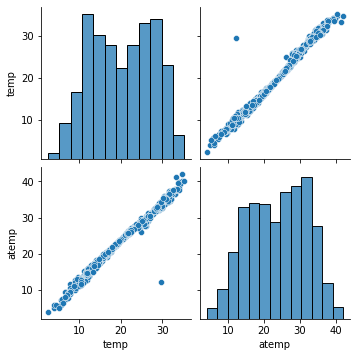

In [36]:
sns.pairplot(df_day, vars=['temp','atemp'])
plt.show()

# temp and atemp have some relationship we will check the correlation after checking for other variables 


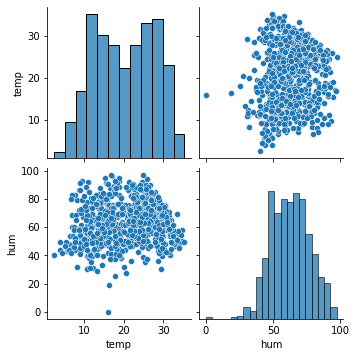

In [37]:
sns.pairplot(df_day, vars=['temp','hum'])
plt.show()

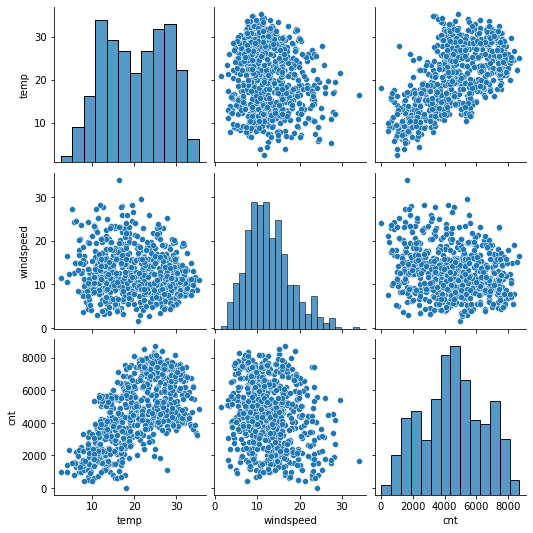

In [22]:
sns.pairplot(df_day, vars=['temp','windspeed',"cnt"])
plt.show()

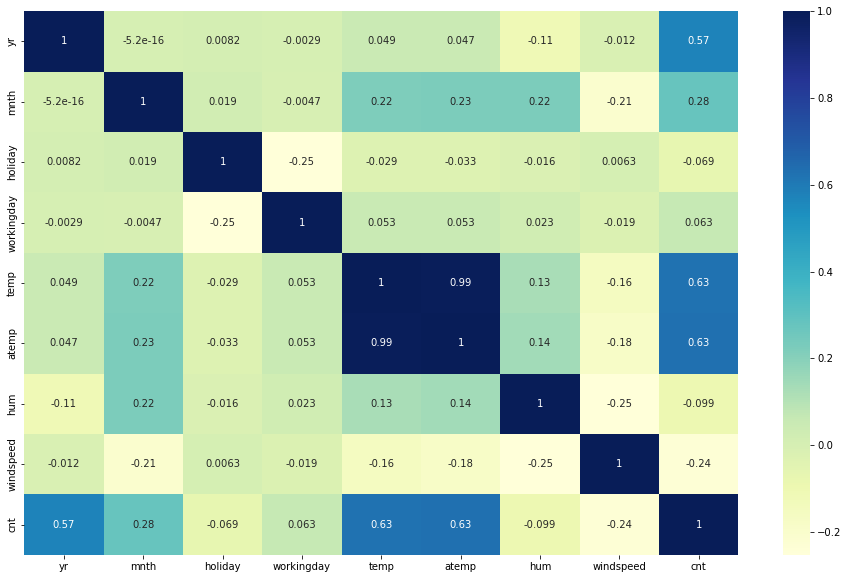

In [66]:
# find out correlation of variables
plt.figure(figsize = (16, 10))
sns.heatmap(df_day.corr(), annot = True, cmap="YlGnBu")
plt.show()



In [67]:
# there is strong relationship between temp and atemp .99 which is significant so we can drop one variable
df_day.drop(['temp'],axis=1,inplace=True)
df_day.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Few Clouds,11.46350,43.6957,12.522300,1600


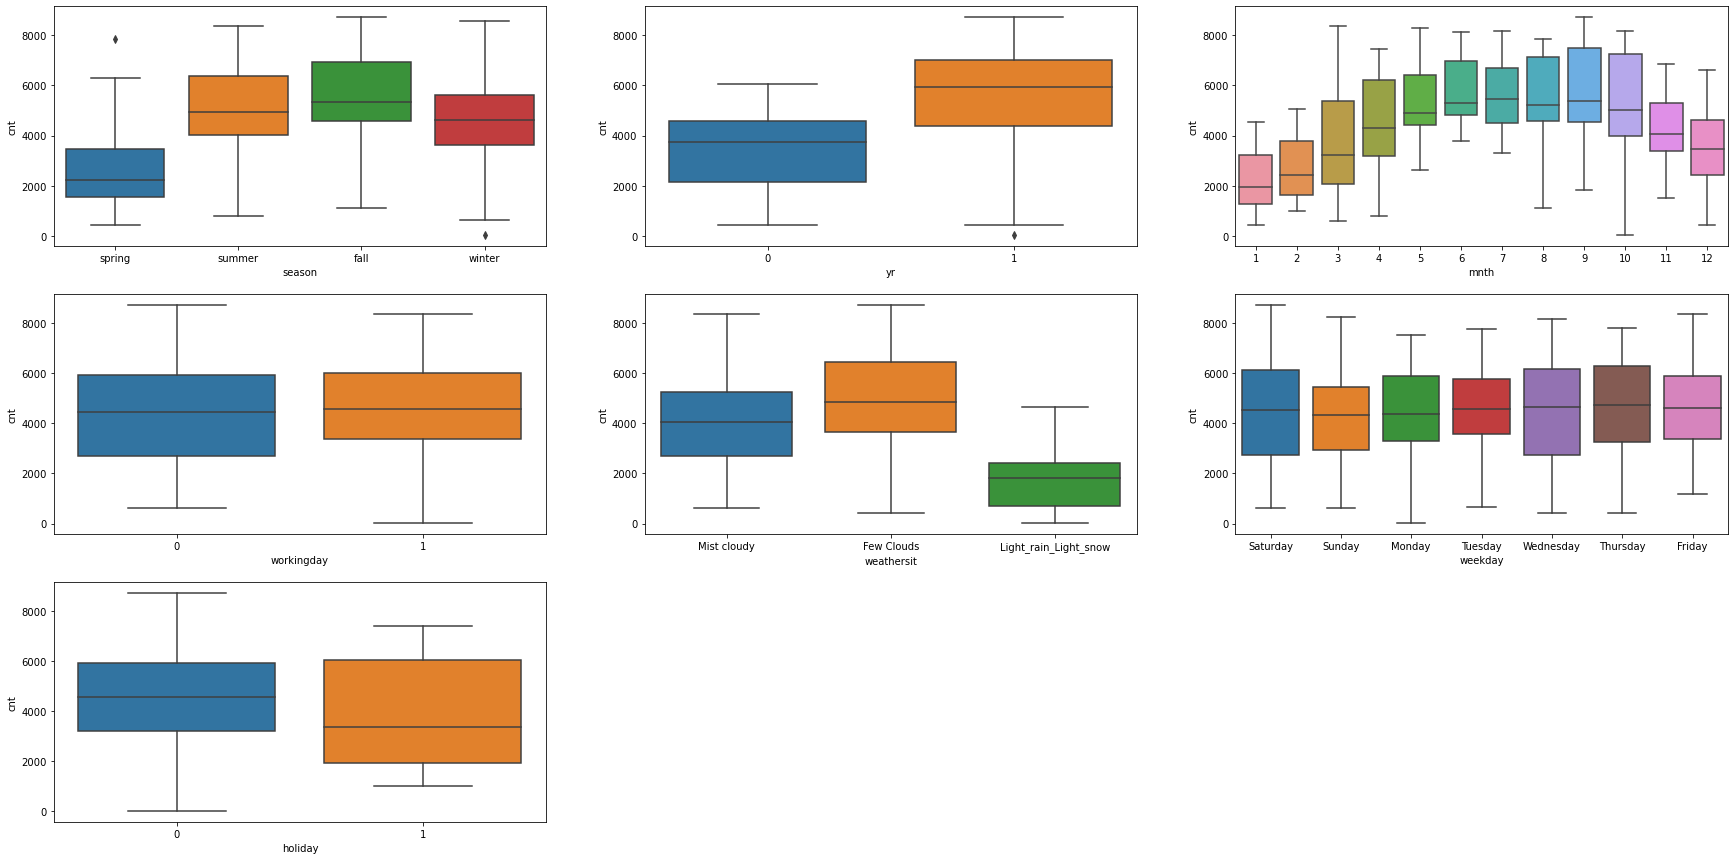

In [69]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_day)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df_day)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_day)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_day)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_day)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_day)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_day)
plt.show()

In [70]:
#Convert variables to object type
df_day['mnth']=df_day['mnth'].astype(object)
df_day['season']=df_day['season'].astype(object)
df_day['weathersit']=df_day['weathersit'].astype(object)
df_day['weekday']=df_day['weekday'].astype(object)
df_day.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [71]:
# create few dummy variables for month, season, weathersit, weekday
Seasoncondition=pd.get_dummies(df_day['season'],drop_first=True)
Weathercondition=pd.get_dummies(df_day['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(df_day['weekday'],drop_first=True)
Month=pd.get_dummies(df_day['mnth'],drop_first=True)



In [73]:
df_day=pd.concat([df_day,Seasoncondition],axis=1)
df_day=pd.concat([df_day,Weathercondition],axis=1)
df_day=pd.concat([df_day,Day_of_week],axis=1)
df_day=pd.concat([df_day,Month],axis=1)
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season                 730 non-null    object 
 1   yr                     730 non-null    int64  
 2   mnth                   730 non-null    object 
 3   holiday                730 non-null    int64  
 4   weekday                730 non-null    object 
 5   workingday             730 non-null    int64  
 6   weathersit             730 non-null    object 
 7   atemp                  730 non-null    float64
 8   hum                    730 non-null    float64
 9   windspeed              730 non-null    float64
 10  cnt                    730 non-null    int64  
 11  spring                 730 non-null    uint8  
 12  summer                 730 non-null    uint8  
 13  winter                 730 non-null    uint8  
 14  Light_rain_Light_snow  730 non-null    uint8  
 15  Mist c

In [74]:
#Deleting the orginal columns season.weathersit,weekday,mnth
df_day.drop(['season'],axis=1,inplace=True)
df_day.drop(['weathersit'],axis=1,inplace=True)
df_day.drop(['weekday'],axis=1,inplace=True)
df_day.drop(['mnth'],axis=1,inplace=True)

df_day.head()



,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# we can prepare data
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_day_train, df_day_test = train_test_split(df_day, train_size = 0.7, test_size = 0.3, random_state = 100)
df_day_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [77]:
df_day_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [78]:
# we can scale numerical data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [80]:
df_day_train.head()
df_day_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,23.493909,63.112926,12.831318,4486.382353,0.243137,0.245098,0.24902,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.468282,8.090038,14.156632,5.291832,1952.158739,0.429398,0.430568,0.43287,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,24.020400,63.437500,12.083182,4530.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
num_vars=['atemp','hum','windspeed','cnt']
df_day_train[num_vars] = scaler.fit_transform(df_day_train[num_vars])


C:\MV\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [82]:
df_day_train.head()
df_day_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
#CREATING X AND Y
Ytrain = df_day_train.pop('cnt')
Xtrain = df_day_train


In [84]:
Xtrain.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light_rain_Light_snow,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [85]:
Ytrain.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [86]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [87]:
# RFE APPROACH FOR FEATURE SELECTION

lrm = LinearRegression()
lrm.fit(Xtrain, Ytrain)

rfe = RFE(lrm, 15)            
rfe = rfe.fit(Xtrain, Ytrain)

C:\MV\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [88]:
list(zip(Xtrain.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1),
 ('Light_rain_Light_snow', True, 1),
 ('Mist cloudy', True, 1),
 ('Monday', False, 11),
 ('Saturday', False, 3),
 ('Sunday', False, 10),
 ('Thursday', False, 13),
 ('Tuesday', False, 12),
 ('Wednesday', False, 14),
 (2, False, 5),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 6),
 (8, True, 1),
 (9, True, 1),
 (10, False, 2),
 (11, False, 8),
 (12, False, 9)]

In [89]:
col = Xtrain.columns[rfe.support_]
col

Index([                   'yr',               'holiday',
                       'atemp',                   'hum',
                   'windspeed',                'spring',
                      'winter', 'Light_rain_Light_snow',
                 'Mist cloudy',                       3,
                             4,                       5,
                             6,                       8,
                             9],
      dtype='object')

In [91]:
Xtrain.columns[~rfe.support_]

Xtrain_rfe = Xtrain[col]

In [92]:
# now we can start building model

import statsmodels.api as sm  
Xtrain_rfe1 = sm.add_constant(Xtrain_rfe)

C:\MV\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [93]:
lrm = sm.OLS(Ytrain,Xtrain_rfe1).fit()

In [94]:
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          8.06e-186
Time:                        16:10:12   Log-Likelihood:                 506.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     494   BIC:                            -913.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = Xtrain_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.72
2,atemp,15.52
4,windspeed,4.56
5,spring,3.52
6,winter,3.21
8,Mist cloudy,2.26
0,yr,2.08
13,8,1.90
11,5,1.77
10,4,1.68


In [96]:
Xtrain_rfe1.head()

,const,yr,holiday,atemp,hum,windspeed,spring,winter,Light_rain_Light_snow,Mist cloudy,3,4,5,6,8,9
653,1.0,1,0,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1.0,1,0,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.438975,0.640189,0.255342,1,0,0,1,1,0,0,0,0,0
728,1.0,1,0,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0.391735,0.504508,0.188475,0,0,0,1,0,1,0,0,0,0


In [97]:
# we can drop column because of high vif  
Xtrain_rfe=Xtrain_rfe.drop(['hum'],axis=1)

In [98]:
import statsmodels.api as sm  
Xtrain_rfe1 = sm.add_constant(Xtrain_rfe)

C:\MV\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [99]:
lrm1 = sm.OLS(Ytrain,Xtrain_rfe1).fit()

In [100]:
print(lrm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.8
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          2.75e-183
Time:                        16:29:00   Log-Likelihood:                 497.88
No. Observations:                 510   AIC:                            -965.8
Df Residuals:                     495   BIC:                            -902.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = Xtrain_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.26
3,windspeed,4.56
4,spring,2.10
0,yr,2.08
5,winter,1.97
12,8,1.86
11,6,1.64
10,5,1.60
7,Mist cloudy,1.55
9,4,1.54


In [102]:
# atemp also has high vif so drop it 
Xtrain_rfe=Xtrain_rfe.drop(['atemp'],axis=1)

In [103]:
Xtrain_rfe2 = sm.add_constant(Xtrain_rfe)
lrm2 = sm.OLS(Ytrain,Xtrain_rfe2).fit()
print(lrm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     134.4
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          3.90e-153
Time:                        16:30:45   Log-Likelihood:                 423.38
No. Observations:                 510   AIC:                            -818.8
Df Residuals:                     496   BIC:                            -759.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.50

C:\MV\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [104]:

vif = pd.DataFrame()
X = Xtrain_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.95
3,spring,2.10
0,yr,1.90
4,winter,1.80
6,Mist cloudy,1.54
8,4,1.48
9,5,1.32
7,3,1.31
11,8,1.31
10,6,1.24


In [105]:
# we can drop windspeed as it has high VIF 
Xtrain_rfe=Xtrain_rfe.drop(['windspeed'],axis=1)

In [106]:
Xtrain_rfe3 = sm.add_constant(Xtrain_rfe)
lrm3 = sm.OLS(Ytrain,Xtrain_rfe3).fit()
print(lrm3.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     134.9
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          9.96e-148
Time:                        16:47:55   Log-Likelihood:                 407.93
No. Observations:                 510   AIC:                            -789.9
Df Residuals:                     497   BIC:                            -734.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.46

C:\MV\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [107]:
# we can drop Winter because of high p-value and it will be insignificance 
Xtrain_rfe=Xtrain_rfe.drop(['winter'],axis=1)

In [109]:
Xtrain_rfe4 = sm.add_constant(Xtrain_rfe)
lrm4 = sm.OLS(Ytrain,Xtrain_rfe4).fit()
print(lrm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     147.4
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          9.28e-149
Time:                        16:50:13   Log-Likelihood:                 407.78
No. Observations:                 510   AIC:                            -791.6
Df Residuals:                     498   BIC:                            -740.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.45

In [110]:
Xtrain_rfe=Xtrain_rfe.drop([4],axis=1)

In [111]:
Xtrain_rfe5 = sm.add_constant(Xtrain_rfe)
lrm5 = sm.OLS(Ytrain,Xtrain_rfe5).fit()
print(lrm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          2.76e-149
Time:                        16:52:26   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.44

C:\MV\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [112]:
vif = pd.DataFrame()
X = Xtrain_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.51
2,spring,1.39
4,Mist cloudy,1.36
5,3,1.22
8,8,1.12
6,5,1.10
9,9,1.10
7,6,1.06
1,holiday,1.03
3,Light_rain_Light_snow,1.02


In [113]:
# we can check if model improves by adding few month 
Xtrain_rfe[7]=Xtrain[7]
Xtrain_rfe.head()

,yr,holiday,spring,Light_rain_Light_snow,Mist cloudy,3,5,6,8,9,7
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1
426,1,0,1,0,1,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0


In [114]:
Xtrain_rfe6 = sm.add_constant(Xtrain_rfe)
lrm6 = sm.OLS(Ytrain,Xtrain_rfe6).fit()
print(lrm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     155.9
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          2.11e-153
Time:                        16:56:36   Log-Likelihood:                 418.78
No. Observations:                 510   AIC:                            -813.6
Df Residuals:                     498   BIC:                            -762.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.42

C:\MV\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [115]:
vif = pd.DataFrame()
X = Xtrain_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.60
2,spring,1.40
4,Mist cloudy,1.37
5,3,1.23
8,8,1.13
9,9,1.11
6,5,1.10
10,7,1.07
7,6,1.06
1,holiday,1.03


In [116]:
# we can add another month
Xtrain_rfe[10]=Xtrain[10]
Xtrain_rfe.head()


,yr,holiday,spring,Light_rain_Light_snow,Mist cloudy,3,5,6,8,9,7,10
653,1,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,1,0
426,1,0,1,0,1,1,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0


In [117]:
Xtrain_rfe7 = sm.add_constant(Xtrain_rfe)
lrm7 = sm.OLS(Ytrain,Xtrain_rfe7).fit()
print(lrm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          3.06e-160
Time:                        17:00:41   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.40

C:\MV\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [118]:
vif = pd.DataFrame()
X = Xtrain_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.67
2,spring,1.42
4,Mist cloudy,1.41
5,3,1.23
8,8,1.14
11,10,1.14
9,9,1.12
6,5,1.11
10,7,1.08
7,6,1.07


In [119]:
Ytrain_cnt = lrm7.predict(Xtrain_rfe7)

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [122]:
res=Ytrain - Ytrain_cnt

C:\MV\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

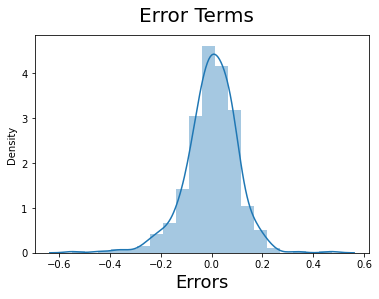

In [123]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [124]:
print(Xtrain_rfe7.shape)
print(res.shape)

(510, 13)
(510,)


In [125]:
#Scaling the test data

num_vars=['atemp','hum','windspeed','cnt']
df_day_test[num_vars] = scaler.fit_transform(df_day_test[num_vars])

C:\MV\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [126]:
#Creating x and y sets

Ytest = df_day_test.pop('cnt')
Xtest = df_day_test

In [127]:
Xtrain_new=Xtrain_rfe7.drop(['const'], axis=1)

In [128]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

Xtest_new = Xtest[Xtrain_new.columns]

# Adding a constant variable 
Xtest_new = sm.add_constant(Xtest_new)

C:\MV\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [129]:
#Making predictions on the chosen model

Ypred = lrm7.predict(Xtest_new)

Text(0, 0.5, 'ypred')

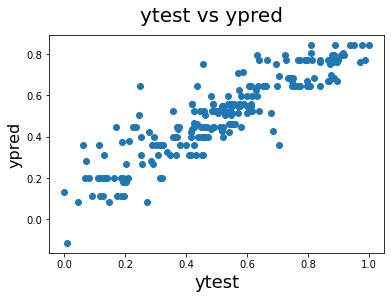

In [130]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(Ytest,Ypred)
fig.suptitle('ytest vs ypred', fontsize=20)              # Plot heading 
plt.xlabel('ytest', fontsize=18)                          # X-label
plt.ylabel('ypred', fontsize=16)                          # Y-label

In [131]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
np.sqrt(mean_squared_error(Ytest, Ypred))

0.10767288514704769

In [132]:
#Calculate the r square for test

r_squared = r2_score(Ytest, Ypred)
r_squared

0.7955961097986249

In [ ]:
#R square of our model is 79.559